In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from IPython.display import clear_output
import time as t
from tqdm import tqdm

In [9]:
csv = pd.read_csv('dataset.csv')

In [10]:
dataset = csv.to_numpy()

In [11]:
X, y = dataset[:, 0], dataset[:, 1]



indices = list(range(0, len(X)))
np.random.shuffle(indices)

trainAmt = int(len(X) * 0.8)
train, val = indices[:trainAmt], indices[trainAmt:]
trainX, valX = X[train], X[val]
trainY, valY = y[train], y[val]


In [12]:
class Regression:
    def __init__(self, X, y, degree):
        '''
        y = ax + b
        degree -> 1 if linear, 2 if quadratic, etc.
        '''
        self.n = degree + 1
        self.weights = np.array([np.random.uniform(-1, 1) for _ in range(self.n)])        
        self.trainX = X
        self.trainY = y

    def stringFunction(self):
        out = 'y = '
        for i in range(self.n):
            out += f'{round(self.weights[i], 2)}{f'x{f'^{self.n-i-1}' if self.n-i-1 > 1 else ''}' if self.n-i-1 > 0 else ''}'
            if i != self.n - 1:
                out += ' + ' 
        return out


    def predict(self, x):
        if np.array(x).shape == ():
            return np.polyval(self.weights, x)
        else:
            out = np.array([])
            for i in x:
                out = np.append(out, np.polyval(self.weights, i))
            return out

    
    def error(self, yTrue, yPred):
        # MSE
        totalError = 0
        for idx in range(len(yTrue)):
            totalError += (yTrue[idx] - yPred[idx]) ** 2
        return totalError / len(yTrue)
    
    def gradientDescentStep(self, learningRate):
        h = 0.0000001
        gradient = np.array([])
        for i in range(self.n):
            initError = self.error(self.trainY, self.predict(trainX))
            self.weights[i] += h
            partialDerivative = ((self.error(self.trainY, self.predict(trainX)) - initError) / h)
            self.weights[i] -= h

            gradient = np.append(gradient, partialDerivative)
            
        gradient *= -1
        self.weights += (gradient * learningRate)

        return self.error(self.trainY, self.predict(trainX))

In [13]:
model = Regression(trainX, trainY, degree=1)

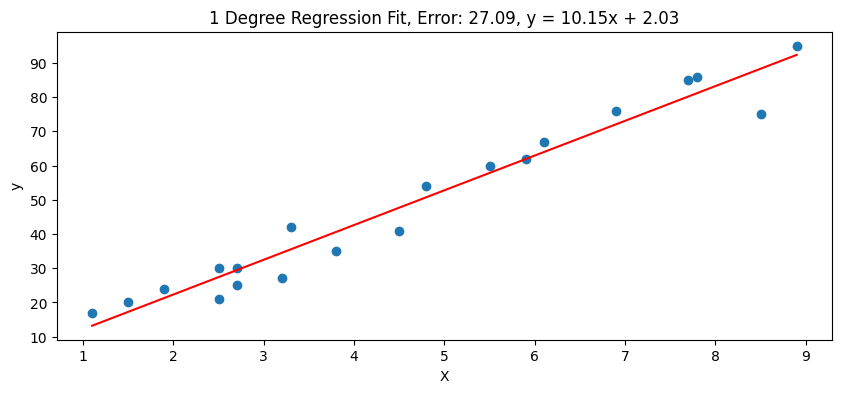

 10%|▉         | 4848/50000 [00:10<01:33, 482.22it/s]


In [14]:
plt.ion()

errorHistory = []

fig, ax = plt.subplots()
try:
    for epoch in tqdm(range(50000)):
        modelXTrainError = model.gradientDescentStep(learningRate=0.03)
        errorHistory.append((modelXTrainError, model.error(valY, model.predict(valX))))

        if epoch % 100 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(10,4))
            plt.scatter(trainX, trainY)
            plt.plot([i for i in np.linspace(trainX.min(), trainX.max(), num=100)], [model.predict(i) for i in np.linspace(trainX.min(), trainX.max(), num=100)], color='red')
            plt.title(f"{model.n-1} Degree Regression Fit, Error: {round(modelXTrainError, 2)}, {model.stringFunction()}")
            plt.xlabel("X")
            plt.ylabel("y")
            plt.show()
except KeyboardInterrupt:
    pass
except Exception as e:
    print(e)


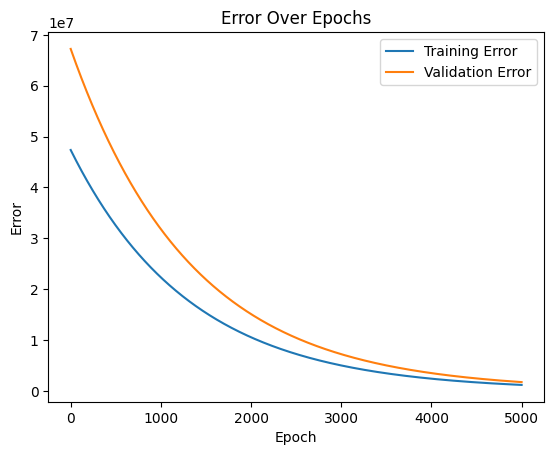

In [ ]:
plt.clf()
plt.plot(list(range(0, len(errorHistory))), [i[0] for i in errorHistory], label = 'Training Error')
plt.plot(list(range(0, len(errorHistory))), [i[1] for i in errorHistory], label = 'Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Over Epochs')
plt.legend()
plt.show()